In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

* PROBLEM STATEMENT 1

Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

Bangalore 412
Mumbai 303
New Delhi 215
Gurgaon 166
Noida 46


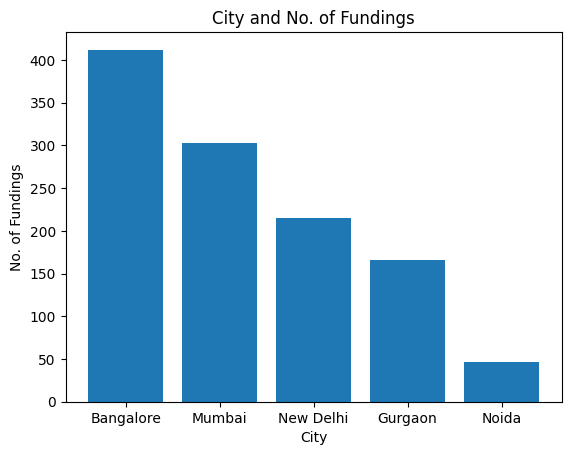

In [74]:
df=pd.read_csv('startup_funding.csv',encoding='utf-8')
# Dropping NAN values in columns of concern
df.dropna(subset=['CityLocation','AmountInUSD'],inplace=True)
# Splitting multiple locations
def seprateCity(city):
    return city.split('/')[0].strip()
df['CityLocation']=df['CityLocation'].apply(seprateCity)
#print(df['CityLocation'].unique())
df['CityLocation'].replace(['Delhi','bangalore'],['New Delhi','Bangalore'],inplace=True)
#print(df['CityLocation'].unique())
df=df[(df['CityLocation']=='Bangalore')|(df['CityLocation']=='Mumbai')|(df['CityLocation']=='Gurgaon')|(df['CityLocation']=='Noida')|(df['CityLocation']=='New Delhi')]
# add column
df['add']=1
# evaluating summation of all number of occurances of cities
df=df.groupby(by='CityLocation')['add'].sum()
df.sort_values(ascending=False,inplace=True)
city=df.index
no_of_fundings=df.values
for i in range(len(city)):
    print(city[i],no_of_fundings[i]) 

# Plotting histogram
plt.bar(city,no_of_fundings)
plt.title('City and No. of Fundings')
plt.xlabel('City')
plt.ylabel('No. of Fundings')
plt.show()

* PROBLEM SATEMENT 2

Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


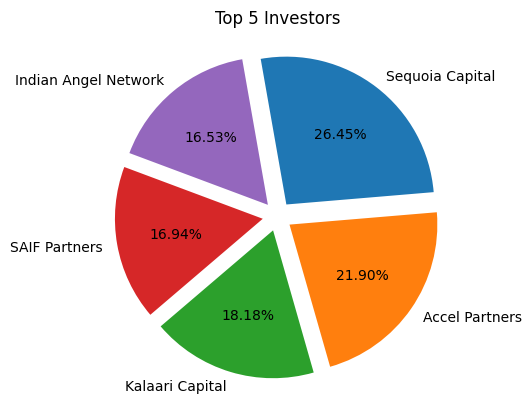

In [75]:
df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df=df.dropna(subset=['InvestorsName']) # Dropping NAN investor names
# Dropping undisclosed investors
df = df[(df.InvestorsName != '') | (df.InvestorsName != 'Undisclosed Investors') | (df.InvestorsName != 'Undisclosed investors') | (df.InvestorsName != 'undisclosed investors') | (df.InvestorsName != 'undisclosed investor')]

investors = df.InvestorsName
#print(investors)
investors_name = []
for i in investors:
    if i != "":
        temp = i.split(",")
        for j in temp:
            investors_name.append(j.strip()) # Remove spaces
            
dct = {} # Create dictionary
for i in investors_name:
    dct[i] = dct.get(i,0) + 1 # dictionary.get(keyname, value=0)  value to return if dictionary key doesnot exist

dct_keys = sorted(dct,key=dct.get,reverse=True)
c=0
Inv_name=[]
count=[]
for i in range(len(dct_keys)):
    print(dct_keys[i],dct[dct_keys[i]])
    Inv_name.append(dct_keys[i])
    count.append(dct[dct_keys[i]])
    c+=1
    if c==5:
        break

plt.pie(count,labels=Inv_name,autopct='%0.2f%%',counterclock=False,startangle=100,explode=[0.1,0.1,0.1,0.1,0.1])
plt.title('Top 5 Investors')
plt.show()

* PROBLEM STATEMENT 3

After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.